# Nanonets OCR Package

- This package is an optical character recognition (OCR) tool for python. 
- It reads plain text and tables from image & PDF files using an OCR engine and provides intelligent post-processing options to ensure you get OCR results in formats you want.

Let's get started.

### Download the package using pip

`pip install ocr-nanonets-wrapper`

### Import
You can start by importing the package in a .py file or a .ipynb notebook

In [10]:
# !pip install ocr-nanonets-wrapper

In [1]:
from nanonets import NANONETSOCR
model = NANONETSOCR()

### Authenticate
- This software is perpetually free :)
- You can get your free API key (with unlimited requests) by creating a free account on [https://app.nanonets.com/#/keys](https://app.nanonets.com/#/keys?utm_source=wrapper)

In [2]:
model.set_token('3e2c5de2-2551-11ee-bbe2-e6ea62c80374')

### PDF / Image to String
Let's read below image. There are three formatting options as shown below.

In [3]:
text = model.convert_to_string('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-lotus-purple-750px.png', formatting='lines')

In [5]:
print(text)

Saffron Design
77 Namrata Bldg
Delhi Delhi 400077
Bill To Ship To Invoice # Invoice Date
Kavindra Mannan Kavindra Mannan IN-001 29/01/2019
27 DIf City, Gupta 264, Abdul Rehman
Delhi, Delhi 40003 Mumbai Bihar 40009 P.O.# Due Date
2430/2019 26/04/2019
QTY DESCRIPTION UNIT PRICE AMOUNT
Frontend design restructure 9,999.00 9.999.00
2 Custom icon package 975.00 1.950.00
3 Gandhi mouse pad 99.00 297.00
Subtotal 12.246.00
GST 12.0% 1.469.52
Invoice Total 13.715.52 PaChpw
Terms & Conditions
Payment is due within 15 days
State Bank of India
Account Number 12345678
Routing Number: 09876543210


In [41]:
import re
# Extract the required information using regex patterns
bill_to_pattern = r'Bill To (.+?)\n'
ship_to_pattern = r'Ship To\n(.+?)\n'
invoice_pattern = r'Invoice #\s*(\S+).*?\nInvoice Date\s*(\S+).*?\n'
po_due_pattern = r'P\.O\.#\s*(\S+).*?\nDue Date\s*(\S+).*?\n'
qty_pattern = r'QTY DESCRIPTION UNIT PRICE AMOUNT\n(.+?)\n'
subtotal_pattern = r'Subtotal ([\d.,]+)'
gst_pattern = r'GST \d+\.\d+% ([\d.,]+)'
total_pattern = r'Invoice Total ([\d.,]+)'

bill_to_match = re.search(bill_to_pattern, text)
ship_to_match = re.search(ship_to_pattern, text)
invoice_match = re.search(invoice_pattern, text)
po_due_match = re.search(po_due_pattern, text)
qty_match = re.search(qty_pattern, text)
subtotal_match = re.search(subtotal_pattern, text)
gst_match = re.search(gst_pattern, text)
total_match = re.search(total_pattern, text)

# Extract the information if the patterns matched
bill_to = bill_to_match.group(1) if bill_to_match else None
ship_to = ship_to_match.group(1) if ship_to_match else None
invoice_number, invoice_date = invoice_match.groups() if invoice_match else (None, None)
po_number, due_date = po_due_match.groups() if po_due_match else (None, None)
qty_description = qty_match.group(1) if qty_match else None
subtotal = subtotal_match.group(1) if subtotal_match else None
gst = gst_match.group(1) if gst_match else None
invoice_total = total_match.group(1) if total_match else None

# Print the extracted information
print("Bill To:", bill_to)
print("Ship To:", ship_to)
print("Invoice #:", invoice_number)
print("Invoice Date:", invoice_date)
print("P.O.#:", po_number)
print("Due Date:", due_date)
print("QTY DESCRIPTION:", qty_description)
print("Subtotal:", subtotal)
print("GST 12.0%:", gst)
print("Invoice Total:", invoice_total)



Bill To: Ship To Invoice # Invoice Date
Ship To: None
Invoice #: None
Invoice Date: None
P.O.#: None
Due Date: None
QTY DESCRIPTION: Frontend design restructure 9,999.00 9.999.00
Subtotal: 12.246.00
GST 12.0%: 1.469.52
Invoice Total: 13.715.52


In [16]:
string3 = model.convert_to_string('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-lotus-purple-750px.png', formatting='none')
print(string3)

Saffron Design 77 Namrata Bldg Delhi Delhi 400077 Bill To Ship To Invoice # Invoice Date Kavindra Mannan Kavindra Mannan IN-001 29/01/2019 27 DIf City, Gupta 264, Abdul Rehman Delhi, Delhi 40003 Mumbai Bihar 40009 P.O.# Due Date 2430/2019 26/04/2019 QTY DESCRIPTION UNIT PRICE AMOUNT Frontend design restructure 9,999.00 9.999.00 2 Custom icon package 975.00 1.950.00 3 Gandhi mouse pad 99.00 297.00 Subtotal 12.246.00 GST 12.0% 1.469.52 Invoice Total 13.715.52 PaChpw Terms & Conditions Payment is due within 15 days State Bank of India Account Number 12345678 Routing Number: 09876543210 


### PDF / Image to TXT
Let's read the same image. 
- We have the same three formatting options as above.
- This reads the input and stores a .txt file.

In [9]:
model.convert_to_txt('test.png', output_file_name='output.txt')

In [11]:
model.convert_to_txt('test.png', formatting='lines', output_file_name='output.txt')

In [12]:
model.convert_to_txt('test.png', formatting='none', output_file_name='output.txt')

### PDF / Image to Boxes
- each element contains predicted word and bounding box information
- bounding box information denotes the spatial position of each word in the file

In [18]:
boxes = model.convert_to_boxes('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-impact-black-750px.png')
for box in boxes:
    print(box)

{'text': 'INVOICE', 'xmin': 193, 'ymin': 65, 'xmax': 373, 'ymax': 97}
{'text': 'IN-001', 'xmin': 265, 'ymin': 127, 'xmax': 300, 'ymax': 135}
{'text': 'Invoice', 'xmin': 77, 'ymin': 183, 'xmax': 123, 'ymax': 193}
{'text': 'Date', 'xmin': 129, 'ymin': 183, 'xmax': 159, 'ymax': 193}
{'text': 'P.O.#', 'xmin': 281, 'ymin': 183, 'xmax': 317, 'ymax': 193}
{'text': 'Due', 'xmin': 490, 'ymin': 183, 'xmax': 515, 'ymax': 193}
{'text': 'Date', 'xmin': 522, 'ymin': 183, 'xmax': 551, 'ymax': 193}
{'text': '29/01/2019', 'xmin': 76, 'ymin': 219, 'xmax': 137, 'ymax': 228}
{'text': '2430/2019', 'xmin': 281, 'ymin': 220, 'xmax': 337, 'ymax': 228}
{'text': '26/04/2019', 'xmin': 489, 'ymin': 220, 'xmax': 551, 'ymax': 228}
{'text': 'From', 'xmin': 76, 'ymin': 270, 'xmax': 109, 'ymax': 279}
{'text': 'Bill', 'xmin': 280, 'ymin': 270, 'xmax': 301, 'ymax': 279}
{'text': 'To', 'xmin': 307, 'ymin': 270, 'xmax': 323, 'ymax': 279}
{'text': 'Ship', 'xmin': 489, 'ymin': 269, 'xmax': 519, 'ymax': 282}
{'text': 'To', '

### PDF / Image to CSV
This method extracts tables from your file and prints them in a .csv file.

In [19]:
Image('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-impact-black-750px.png')

TypeError: 'module' object is not callable

In [25]:
model.convert_to_csv('table.png', output_file_name='output.csv')

- Let us open the csv file and take a look at it.
- I am attaching a screenshot of the output.csv generated here

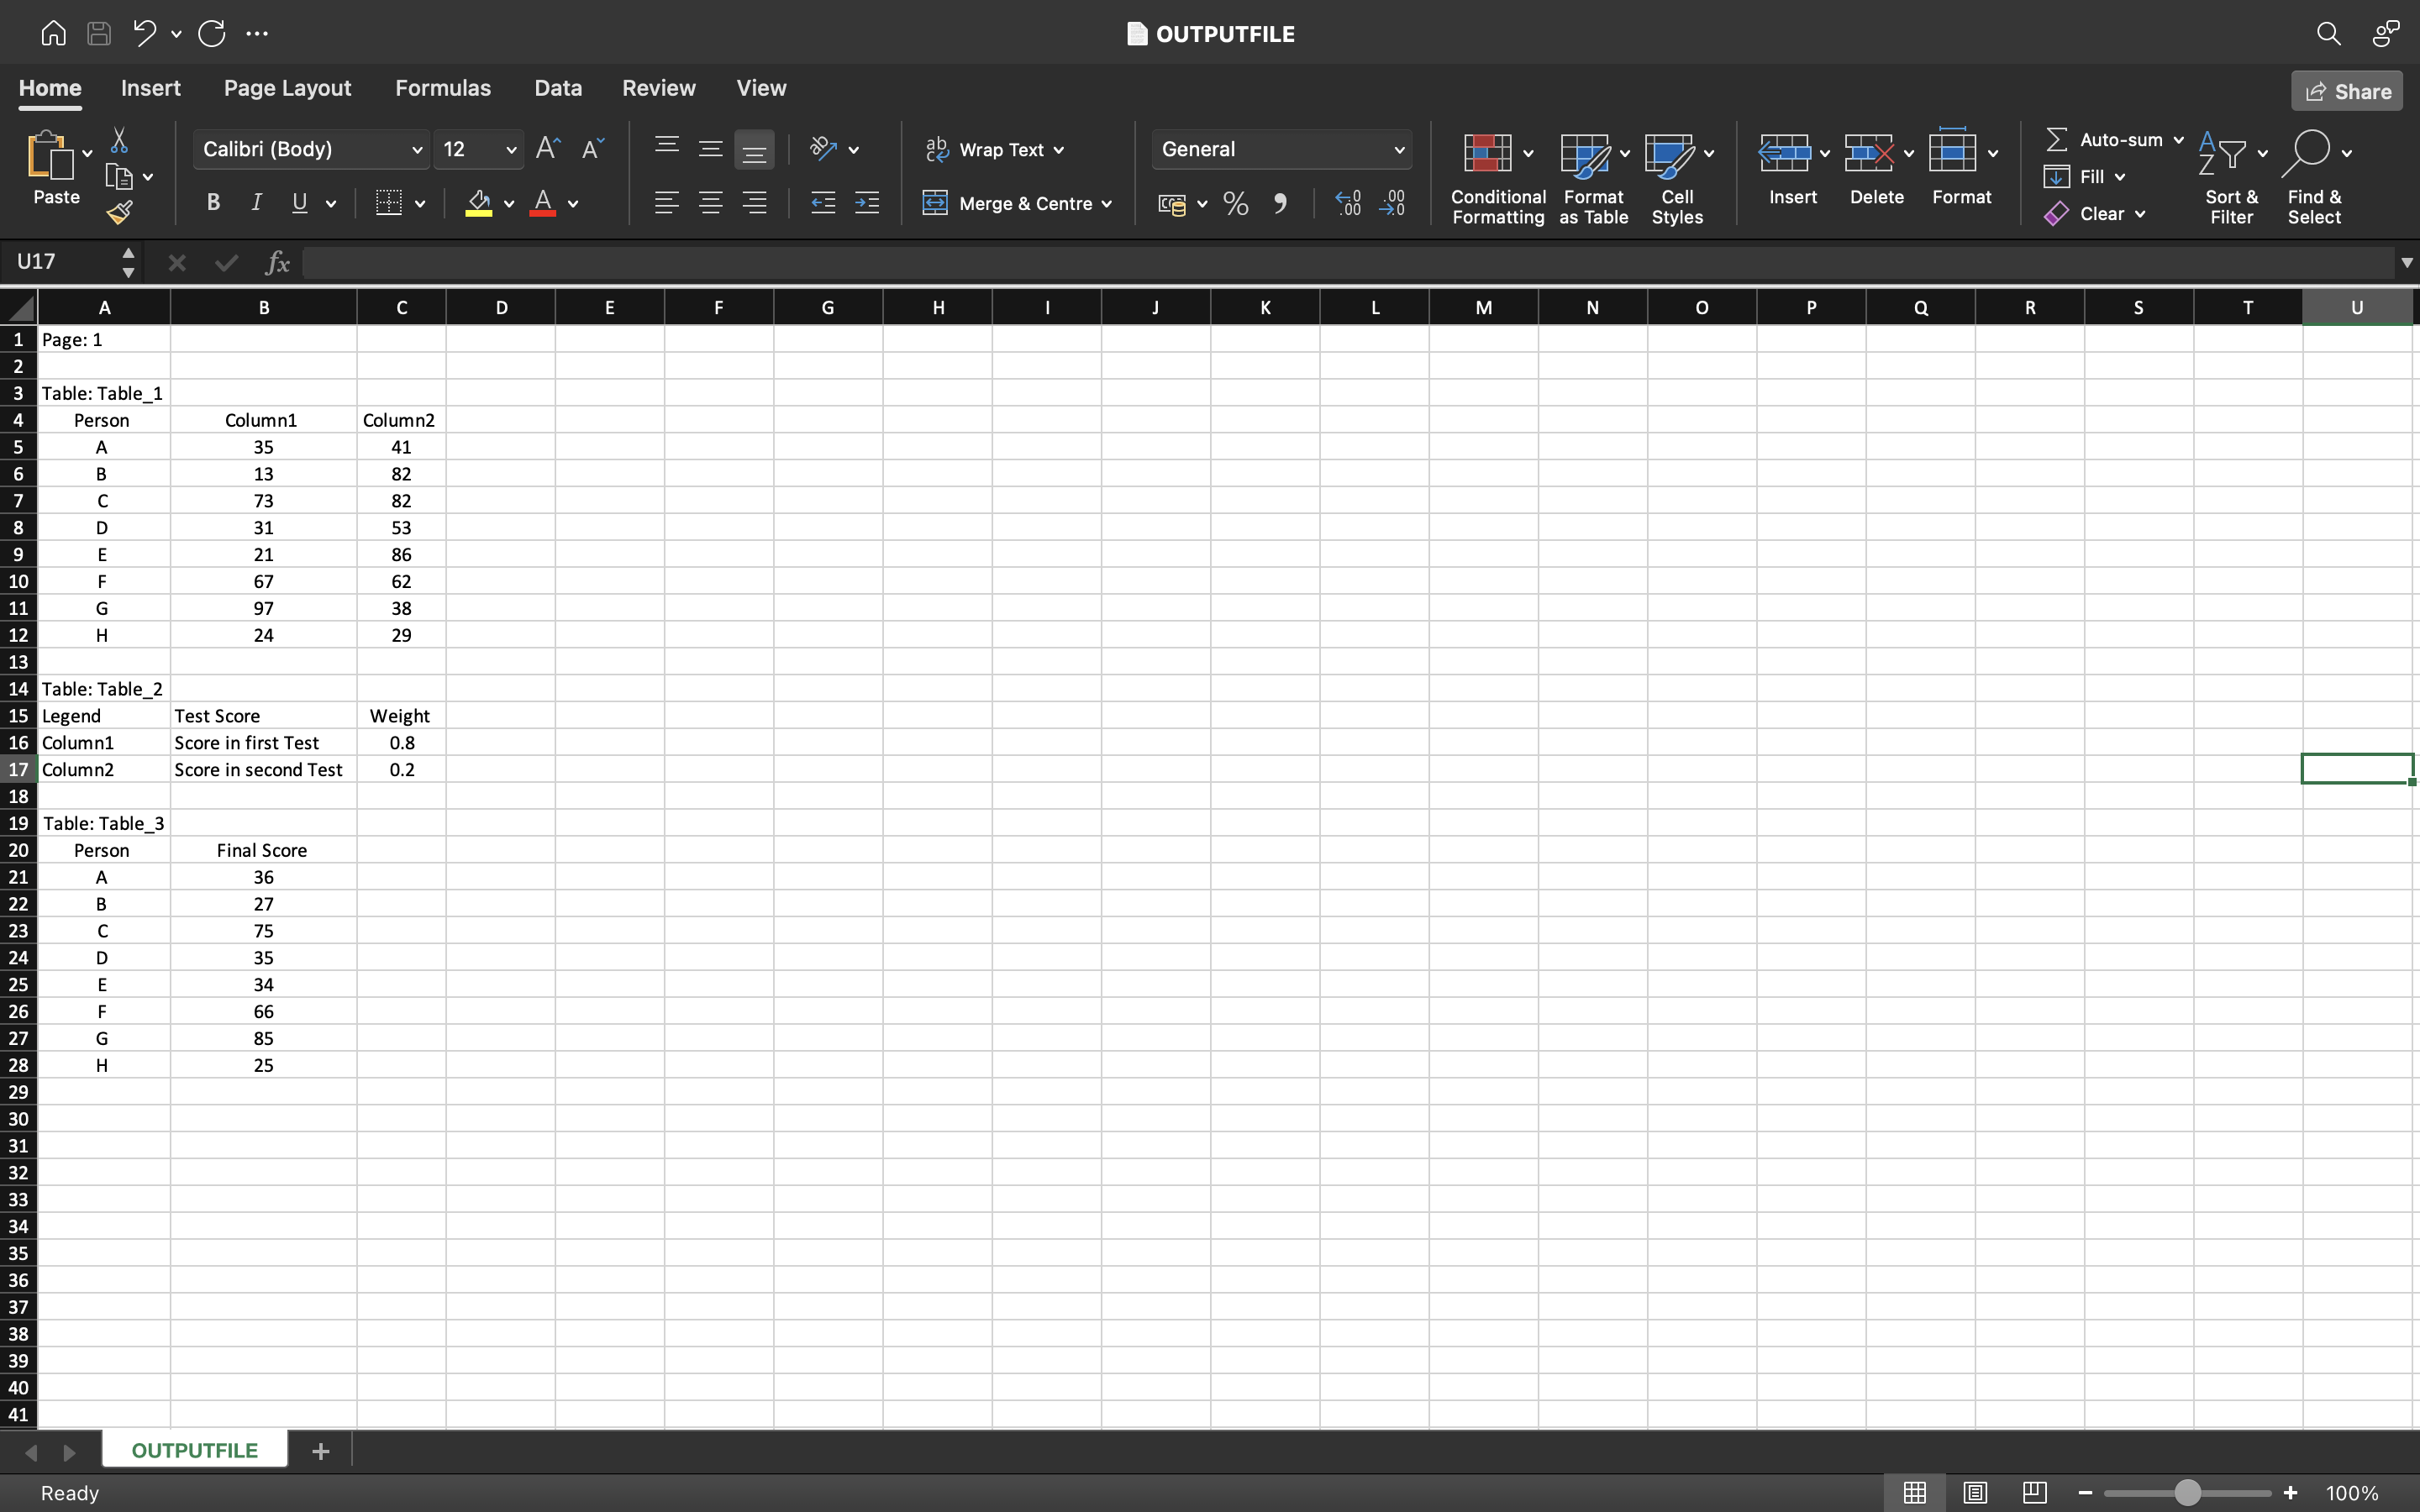

In [26]:
Image('output_csv_screenshot.png')

### PDF / Image to Tables
This method extracts tables from your file and returns a json object.

In [20]:
tables_json = model.convert_to_tables('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-impact-black-750px.png')

Let us take a look at the output

In [21]:
tables_json

[{'message': 'Success',
  'input': 'invoice-template-in-impact-black-750px.png',
  'prediction': [{'id': 'd14f6bbf-56a7-4955-8c7a-61d75579b1ae',
    'label': 'table',
    'xmin': 1,
    'ymin': 258,
    'xmax': 750,
    'ymax': 354,
    'score': 1,
    'ocr_text': 'table',
    'type': 'table',
    'cells': [{'id': '9a6a41da-28c1-4320-98f5-5314bbf35e36',
      'row': 1,
      'col': 1,
      'row_span': 1,
      'col_span': 1,
      'label': '',
      'xmin': 1,
      'ymin': 258,
      'xmax': 14,
      'ymax': 293,
      'score': 0.10864258,
      'text': '',
      'row_label': '',
      'verification_status': 'correctly_predicted',
      'status': '',
      'failed_validation': '',
      'label_id': ''},
     {'id': '94517f11-0370-404a-b797-e6cf9599d123',
      'row': 1,
      'col': 2,
      'row_span': 1,
      'col_span': 1,
      'label': '',
      'xmin': 14,
      'ymin': 258,
      'xmax': 229,
      'ymax': 293,
      'score': 0.38623047,
      'text': 'From',
      'row_labe

### PDF / Image to Searchable PDF
You can directly convert your PDF or image file to a searchable PDF using the below code snippet. This will create a .pdf file as output. You will be able to search and detect all the text present in this output .pdf file.

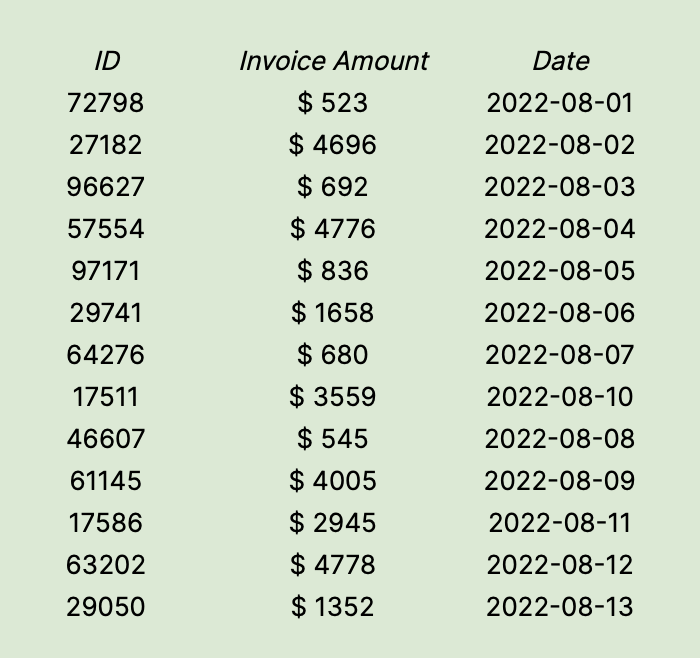

In [36]:
Image('test2.png')

In [37]:
model.convert_to_searchable_pdf('test2.png', output_file_name='output.pdf')

- The output.pdf created is now text searchable
- I am attaching a screenshot of me trying to search for "175" in the document.

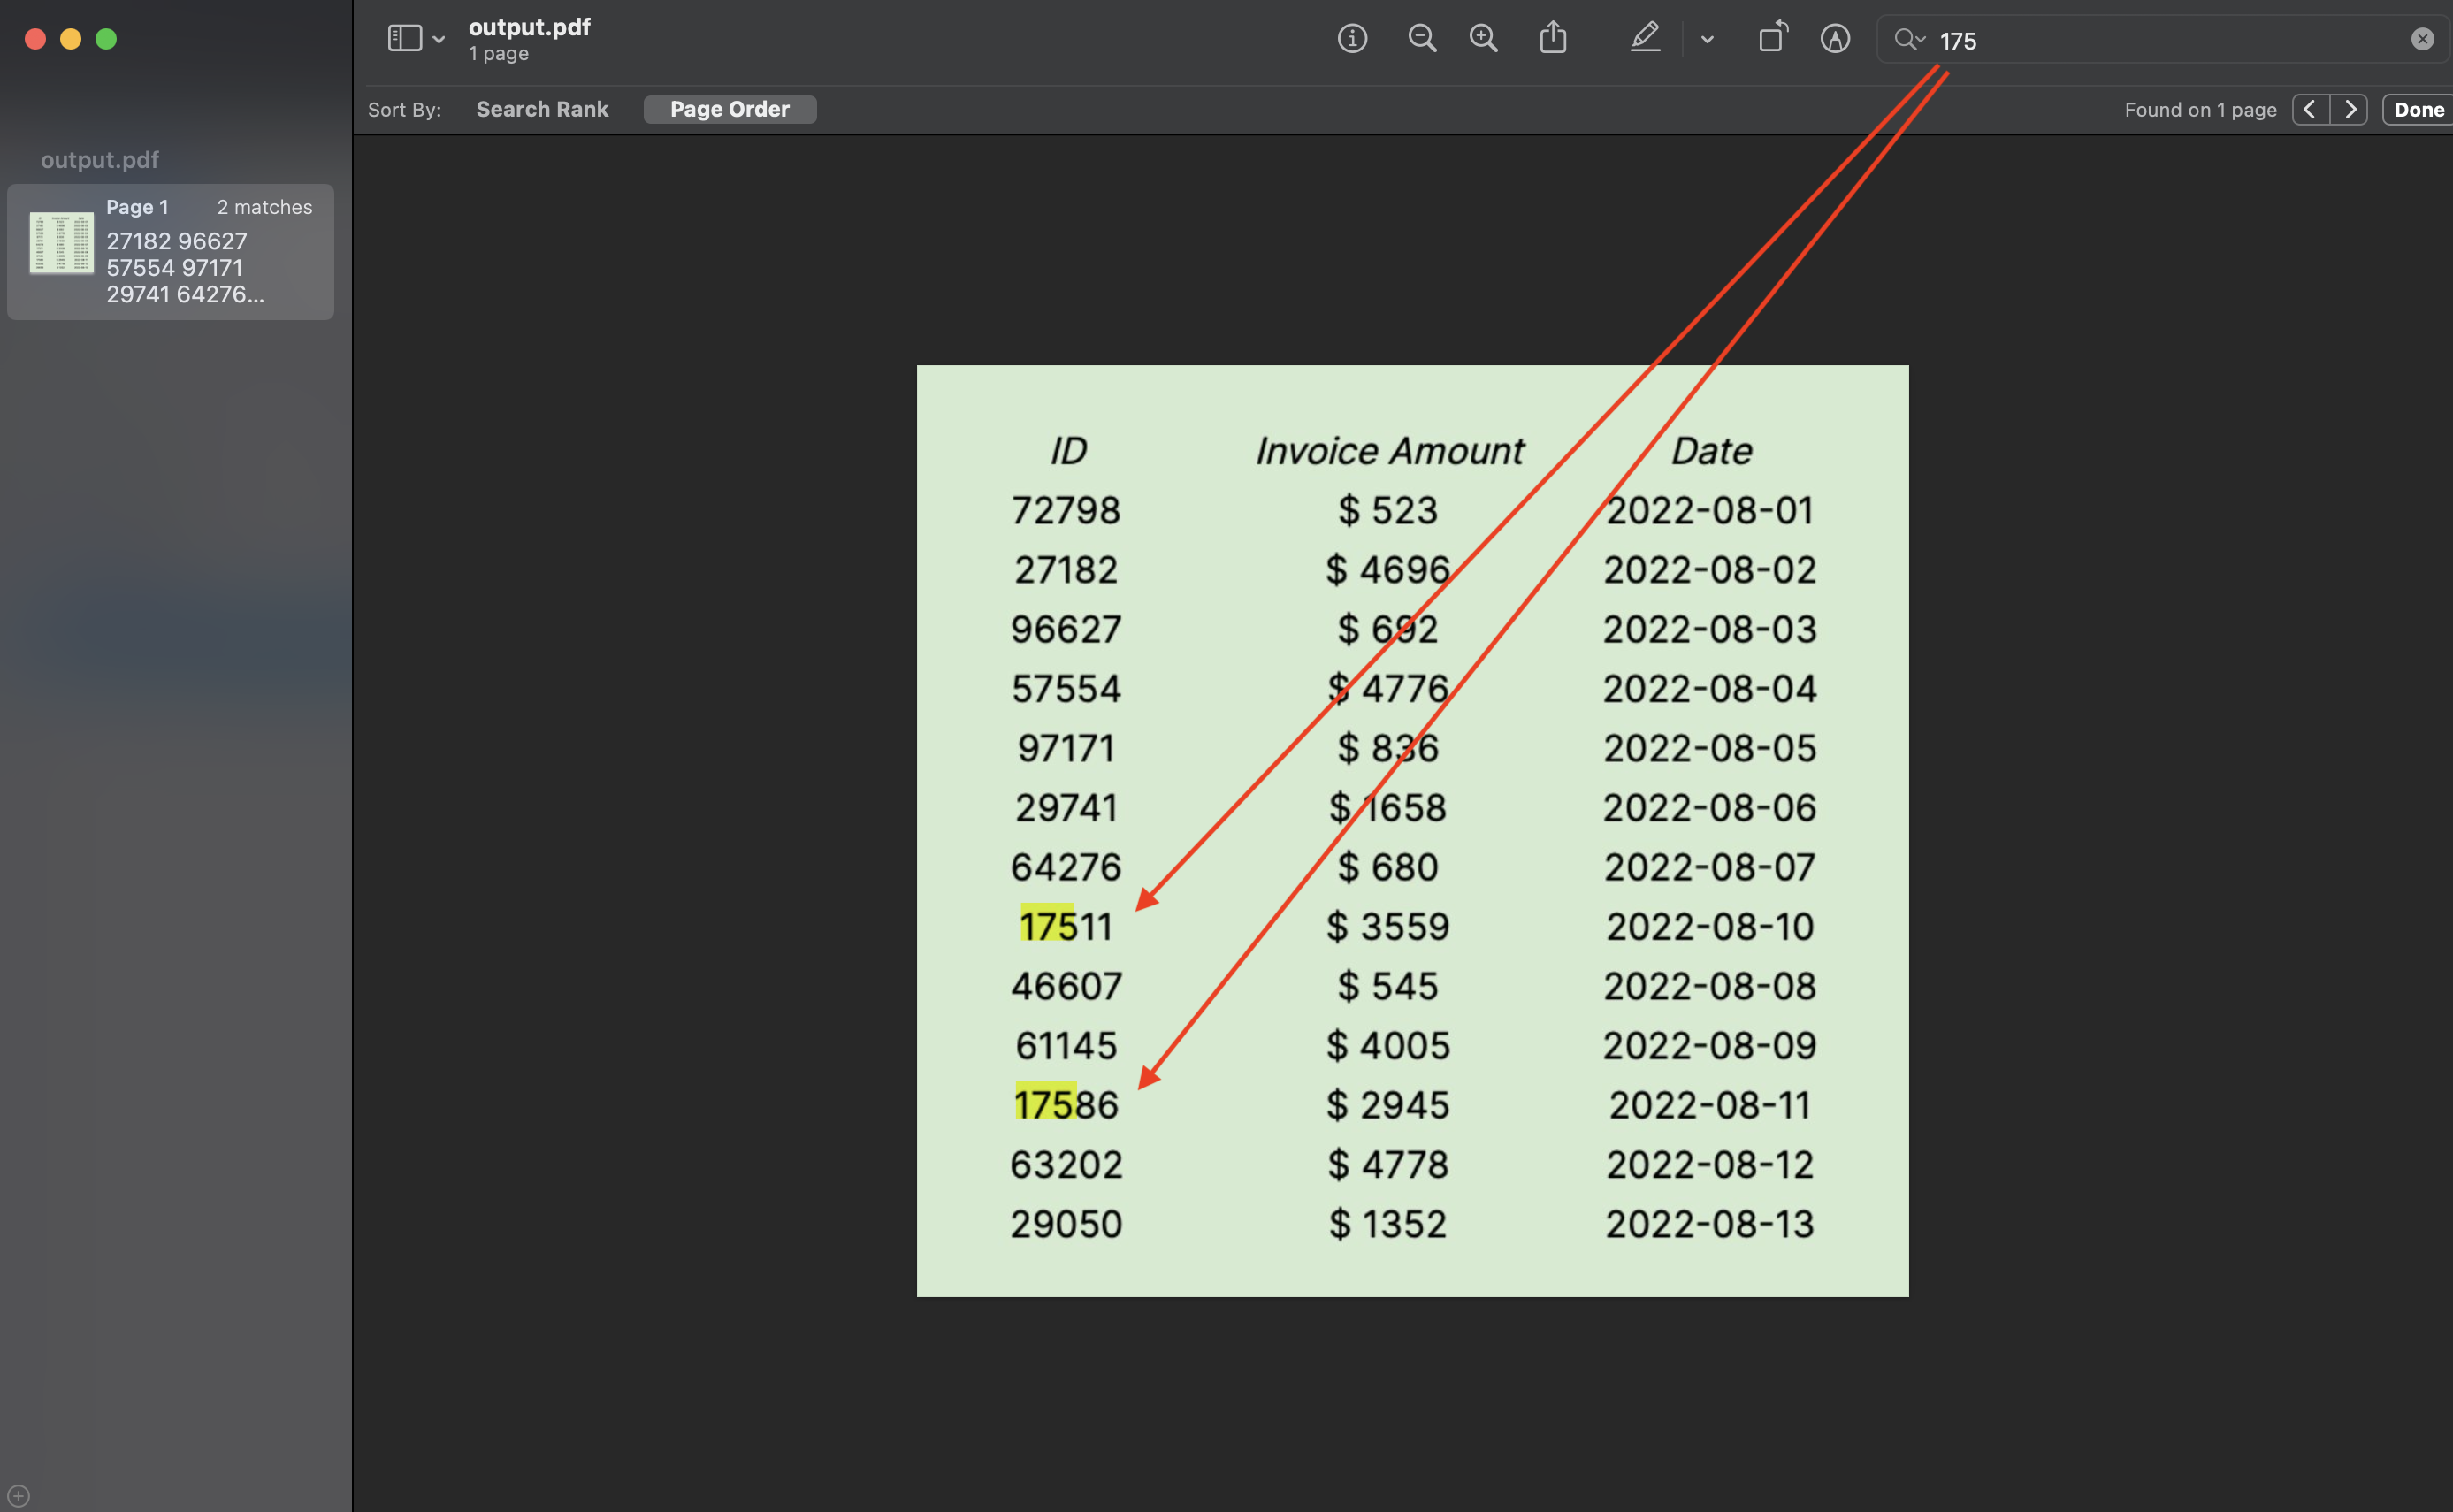

In [38]:
Image('output_pdf_screenshot.png')

### PDF / Image to Raw OCR Engine Output (Text Only)

In [23]:
pred_json = model.convert_to_prediction('/home/teena/Documents/OCR_IMAGE_TEXT/attachments/invoice-template-in-impact-black-750px.png')

Let's take a look at the output

In [24]:
pred_json

{'results': [{'filename': 'invoice-template-in-impact-black-750px.png',
   'page_data': [{'page': 0,
     'size': {},
     'words': [{'text': 'INVOICE',
       'xmin': 193,
       'ymin': 65,
       'xmax': 373,
       'ymax': 97},
      {'text': 'IN-001', 'xmin': 265, 'ymin': 127, 'xmax': 300, 'ymax': 135},
      {'text': 'Invoice', 'xmin': 77, 'ymin': 183, 'xmax': 123, 'ymax': 193},
      {'text': 'Date', 'xmin': 129, 'ymin': 183, 'xmax': 159, 'ymax': 193},
      {'text': 'P.O.#', 'xmin': 281, 'ymin': 183, 'xmax': 317, 'ymax': 193},
      {'text': 'Due', 'xmin': 490, 'ymin': 183, 'xmax': 515, 'ymax': 193},
      {'text': 'Date', 'xmin': 522, 'ymin': 183, 'xmax': 551, 'ymax': 193},
      {'text': '29/01/2019',
       'xmin': 76,
       'ymin': 219,
       'xmax': 137,
       'ymax': 228},
      {'text': '2430/2019',
       'xmin': 281,
       'ymin': 220,
       'xmax': 337,
       'ymax': 228},
      {'text': '26/04/2019',
       'xmin': 489,
       'ymin': 220,
       'xmax': 551,
 

### Have Advanced Intelligent Document Processing Needs ?

We provide OCR and IDP solutions customised for various use cases - invoice automation, Receipt OCR, purchase order automation, accounts payable automation, ID Card OCR and many more.

- Visit [nanonets.com](https://nanonets.com/?&utm_source=wrapper) for enterprise OCR and IDP solutions.
- Sign up on [app.nanonets.com/#/signup](https://app.nanonets.com/#/signup?&utm_source=wrapper) to start a free trial.